# Funciones de distribución de probabilidad

## Distribución uniforme

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(420)

In [3]:
a = 1
b = 20
n = 100000
data_unif = np.random.uniform(a, b, n)

Text(0, 0.5, 'Frecuencia')

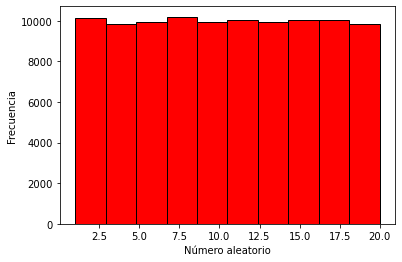

In [4]:
plt.hist(data_unif, color = "red", edgecolor = "black", bins = 10)
plt.xlabel('Número aleatorio')
plt.ylabel('Frecuencia')

## Distribución normal

In [5]:
data = np.random.randn(1000000) # Media 0, desviación 1

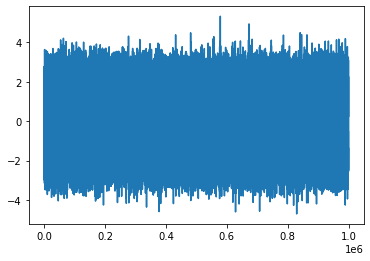

In [6]:
x = range(0,1000000)
plt.plot(x, data)

(array([1.00000e+02, 3.34700e+03, 4.10310e+04, 1.99954e+05, 3.77338e+05,
        2.83720e+05, 8.42110e+04, 9.84900e+03, 4.42000e+02, 8.00000e+00]),
 array([-4.70785838, -3.70448703, -2.70111568, -1.69774434, -0.69437299,
         0.30899835,  1.3123697 ,  2.31574104,  3.31911239,  4.32248373,
         5.32585508]),
 <BarContainer object of 10 artists>)

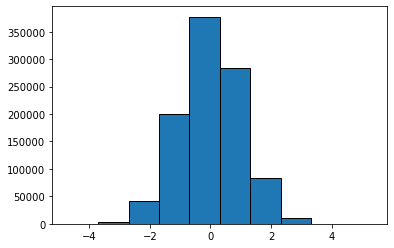

In [7]:
%matplotlib inline
plt.hist(data, edgecolor = "black")

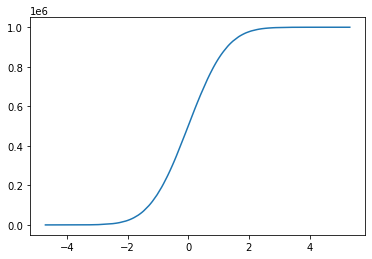

In [8]:
plt.plot(sorted(data),x)

(array([2.000e+00, 2.600e+01, 2.360e+02, 9.610e+02, 2.254e+03, 2.958e+03,
        2.220e+03, 1.051e+03, 2.590e+02, 3.300e+01]),
 array([-5.11020697, -3.19186529, -1.27352362,  0.64481805,  2.56315973,
         4.4815014 ,  6.39984307,  8.31818475, 10.23652642, 12.1548681 ,
        14.07320977]),
 <BarContainer object of 10 artists>)

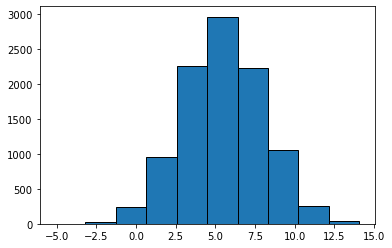

In [9]:
mu = 5.5
sd = 2.5
data = mu + sd*np.random.randn(10000)
plt.hist(data, edgecolor = "black")

In [10]:
data = np.random.randn(2,4) # Dos arrays de tamaño cuatro
data

array([[ 0.87681896,  0.23202457,  1.80853517, -0.06353435],
       [-0.60495406,  1.68398053,  0.95246375, -0.17394935]])

Text(0.5, 0, 'Número aleatorio')

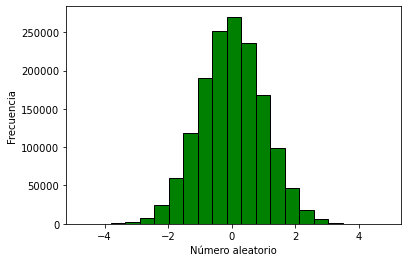

In [10]:
m = 0
v = 1
n = 1500000
data_norm = np.random.normal(m,v,n)
s_bin = int(1 + np.log2(n))

# Plotting
plt.hist(data_norm, color = "green", edgecolor = "black", bins = s_bin)
plt.ylabel('Frecuencia')
plt.xlabel('Número aleatorio')

## La simulación de Monte Carlo

### Generación de números aleatorios

Naturalmente, se necesitan generar números aleatorios para la estimación de $\pi$.

### Calcular $x^2 + y^2$

Si el valor es inferior a uno, estamos dentro del círculo. Caso contrario, está fuera.

### Estimación de $\pi$

Una vez obtenidos los valores que están dentro del círculo y los que están afuera, se pueden dividir. Tras la división de ambos, se multiplica por cuatro y, de esta manera, **¡se puede estimar $\pi$!** 

### Repetición del experimento

Se repite un número suficientemente grande de veces el experimento para obtener un valor final como el promedio de todos los experimentos.

In [27]:
def pi_montecarlo(n, n_exp, plot = False):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(-1,1,n).tolist()
        y = np.random.uniform(-1,1,n).tolist()
        for j in range(n):
            z = x[j] ** 2 + y[j] ** 2
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp
    
    if plot == True:      
        print("Pi es, aproximadamente,", pi ,"\nGráfico de prueba:")
        plt.plot(pi_value_list)
    else:
        return print("Pi es, aproximadamente,", pi)


Pi es, aproximadamente, 3.1412724000000067 
Gráfico de prueba:


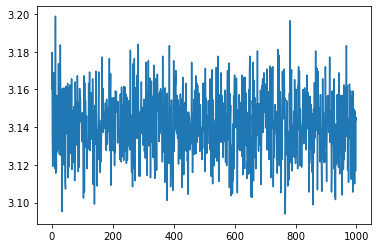

In [33]:
pi_montecarlo(10000, 1000, True)

## Dummy datasets

In [12]:
n = 10000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : np.random.normal(1.5,2.5,n),
        'C' : np.random.uniform(5,32,n)
    }
)
data.describe()

,A,B,C
count,1.000000e+07,1.000000e+07,1.000000e+07
mean,1.495069e-04,1.501131e+00,1.849854e+01
std,9.999225e-01,2.500001e+00,7.794598e+00
min,-5.419170e+00,-1.154105e+01,5.000006e+00
25%,-6.739359e-01,-1.848250e-01,1.174861e+01
50%,4.916446e-05,1.500735e+00,1.849609e+01
75%,6.745521e-01,3.187399e+00,2.524820e+01
max,4.969519e+00,1.735887e+01,3.200000e+01


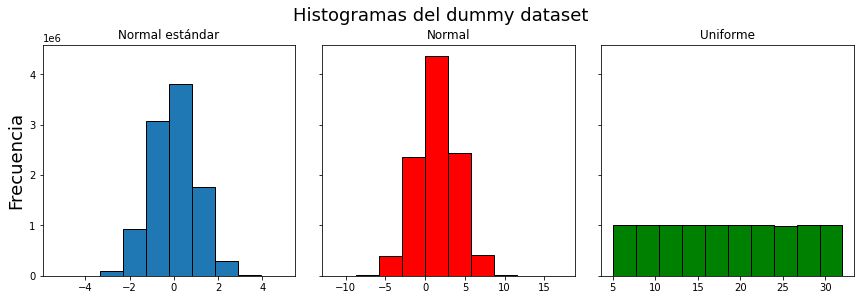

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True)
plt.tight_layout(rect = [0, -0.05, 2, 0.9])

fig.suptitle('Histogramas del dummy dataset', fontsize = 18, x = 1)
ax1.hist(data['A'], edgecolor = "black")
ax1.set_title('Normal estándar')
ax1.set_ylabel('Frecuencia', fontsize = 18)

ax2.hist(data['B'], edgecolor = "black", color = "red")
ax2.set_title('Normal')

ax3.hist(data['C'], edgecolor = "black", color = "green")
ax3.set_title('Uniforme')

plt.show()

In [19]:
data = pd.read_csv("../../datasets/customer-churn-model/Customer Churn Model.txt")
column_names = data.columns.values.tolist()
data.shape

(3333, 21)

In [20]:
new_data = pd.DataFrame(
    {
        'Column Name': column_names,
        'A' : np.random.randn(21),
        'B' : np.random.uniform(0,1,21)
    }, index = range(42, 42+21) # Generar nuevos índices
)
new_data

,Column Name,A,B
42,State,-0.879980,0.985856
43,Account Length,1.929779,0.918754
44,Area Code,-0.958870,0.907109
45,Phone,-1.220266,0.959156
46,Int'l Plan,1.893453,0.032125
47,VMail Plan,-0.337972,0.780415
48,VMail Message,0.362369,0.587723
49,Day Mins,0.957521,0.094472
50,Day Calls,2.025459,0.665732
51,Day Charge,-1.241490,0.137904
